In [ ]:
#!pip list 
%pip install QuantLib
%pip install pandas_datareader
%pip install beautifulsoup4
%pip install yfinance
!pip list

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np

style.use ('dark_background')

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
#df = web.DataReader("TSLA", 'yahoo', start, end)
#df = yf.download("TSLA", start=start, end=end)
#df.to_csv('tsla.csv')
#df = pd.read_csv('tsla.csv',parse_dates = True, index_col=0 )
#SPY = yf.download("SPY", start=start, end=end)
#print(df.head(10))
df_tsla = yf.download("TSLA", start=start, end=end)
df_spy = yf.download("SPY", start=start, end=end)


df_tsla['Growth'] = (df_tsla['Adj Close'] / df_tsla['Adj Close'].iloc[0]) * 100
df_spy['Growth'] = (df_spy['Adj Close'] / df_spy['Adj Close'].iloc[0]) * 100

df_spy.to_csv('SP500')
df_tsla.to_csv('Tesla')
returns_tsla = df_tsla['Adj Close'].pct_change().dropna()
returns_spy = df_spy['Adj Close'].pct_change().dropna()

rolling_covariance = returns_tsla.rolling(window=30).cov(returns_spy)
rolling_variance = returns_spy.rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

cov_matrix = np.cov(returns_tsla, returns_spy)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 2)
rolling_beta.plot(label='30-Day Rolling Beta', color='orange')
plt.title('30-Day Rolling Beta of TSLA vs. SPY')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend(loc='upper left')
plt.grid(True)


plt.figure(figsize=(14, 7))

#beta.plot()
df_tsla['Growth'].plot()
df_spy['Growth'].plot()

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()


In [ ]:
%pip install bqplot  
%pip install ipywidgets
%pip install mplfinance

In [9]:
from bqplot import pyplot as bq
import pandas as pd
from ipywidgets import Label, VBox, Layout
from bqplot.market_map import MarketMap
from bqplot import ColorScale, ColorAxis, DateScale, LinearScale, Axis, Lines, Figure

[*********************100%%**********************]  1 of 1 completed


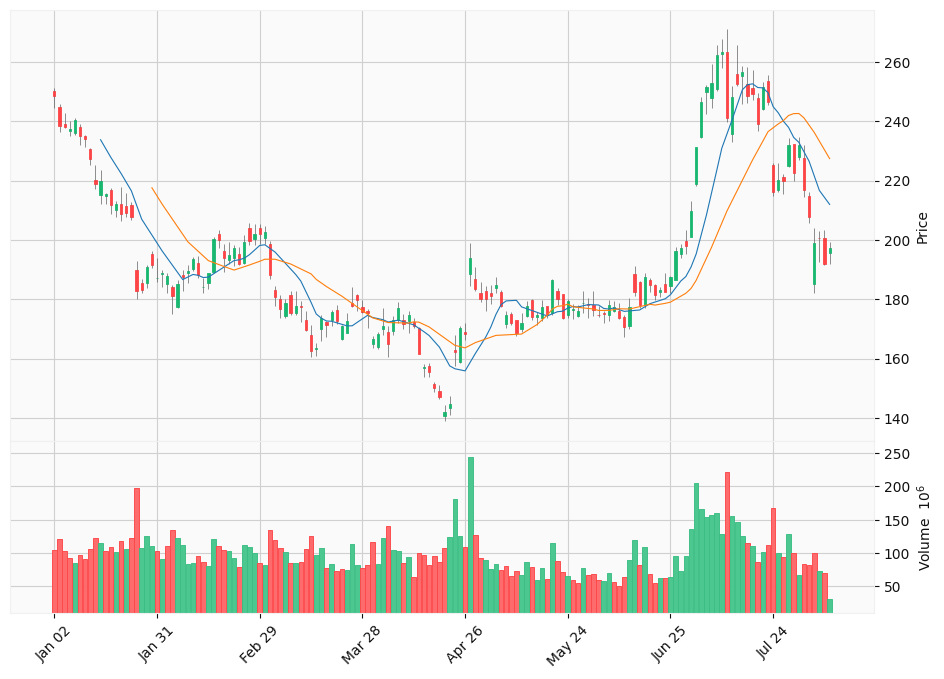

[*********************100%%**********************]  1 of 1 completed


In [16]:
import mplfinance as mpf

#df_tslaCandle = df_tsla['Adj Close'].resample('10D').ohlc()
#df_tslaVolume = df_tsla['Volume'].resample('10D').sum()

# Adding Candle chart data
df_tslaYTD = yf.download("TSLA", start= dt.datetime(2024, 1, 1), end=end)
mpf.plot(df_tslaYTD,type='candle',style = "yahoo" ,volume=True,mav=(10,20),figscale=1.5)

custom_style = mpf.make_mpf_style(
    base_mpf_style='yahoo',   # Base style to start with
    facecolor='black',        # Set the background color to black
    edgecolor='black',        # Optional: set the border color to black to match the background
)

df_SPYYTD = yf.download("SPY", start= dt.datetime(2024, 1, 1), end=end)
mpf.plot(df_SPYYTD,type='candle',style = custom_style ,volume=True,mav=(10,20),figscale=4,savefig='SPY_YTD_Candle.png' )
